# Exploratory Data Analysis

This notebook assumes that data have been collected by running `notebooks/01-scrape_data.ipynb`.

Read data file.

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/reddit_posts.csv")

Sample 10 random rows to get some idea of how to clean the data.

In [2]:
df.sample(10)

,id,created_utc,title,selftext,subreddit_name
1470,r4wd3a,1.638194e+09,How to illustrate in a fairly simple manner ho...,"My thesis defense is coming up next week, and...",LearnMachineLearning
1230,regt37,1.639283e+09,Using AMD Radeon with TF in Anaconda Spyder,"Hello,\n\nI understand that Tensorflow is gea...",LearnMachineLearning
906,rv5yj2,1.641228e+09,NN vs Lookup table,"Hi,\n\nassuming one has collected the 24 pairs...",LearnMachineLearning
101,rq1cnm,1.640650e+09,[D] Diffusion Models Beat GANs on Image Synthe...,"I have been dodging this one long enough, it i...",MachineLearning
766,qnbrji,1.636121e+09,[D] How does ACL rolling review work?,"Hi folks, I am going through the ACL rolling r...",MachineLearning
1144,ri4wl9,1.639702e+09,Suggestions on My Learning Path,Hello everyone! I made myself an ML/DL learnin...,LearnMachineLearning
1540,r1pf4c,1.637820e+09,Image is tinted blue even when opened afresh,&#x200B;\n\n[Original image](https://preview.r...,LearnMachineLearning
128,ro12hr,1.640402e+09,[D] Drawbacks to the Louvain/Leiden algorithm ...,I've been looking for the drawbacks to the Lou...,MachineLearning
264,rfum8k,1.639442e+09,[D] Batch normalisation with batch size 1?,Batch normalisation has shown to have poor p...,MachineLearning
384,r89r8r,1.638567e+09,[D] Are neurips authors required to purchase a...,Question in title. First year accepted -- shou...,MachineLearning


`r/MachineLearning` require the authors to put a tag in the title (e.g. `[D]`, `[Q]`), while `r/learnmachinelearning` doesn't. So to guess whether a post belongs to `r/MachineLearning`, the model just needs to see if its title has a tag. However, such model wouldn't be useful.

See if there are any missing data.

In [3]:
df.isna().sum()

id                 0
created_utc        0
title              0
selftext          22
subreddit_name     0
dtype: int64

In [12]:
df[df.selftext.isna()]

,id,created_utc,title,selftext,subreddit_name
871,rwm2qi,1.641387e+09,Please suggest some Resources to learn ML onli...,NaN,LearnMachineLearning
935,ru6niq,1.641118e+09,Are Transformers state of the art for every ki...,NaN,LearnMachineLearning
947,rtvf85,1.641079e+09,"Got a list of practical ML projects that, surp...",NaN,LearnMachineLearning
985,rrfeyx,1.640804e+09,What kind of technologies and programming lang...,NaN,LearnMachineLearning
1039,ro1s0p,1.640404e+09,What is the minimal requirement to classify a ...,NaN,LearnMachineLearning
1040,ro1ke3,1.640403e+09,How do you make a neural network classified fr...,NaN,LearnMachineLearning
1052,rngzdq,1.640331e+09,Can gpt-j be fine tune to create sales copy? W...,NaN,LearnMachineLearning
1056,rndczs,1.640318e+09,"[D] Hi there, I am hoping to predict next year...",NaN,LearnMachineLearning
1084,rllfmq,1.640113e+09,Has anyone tried using linear regression(Not l...,NaN,LearnMachineLearning
1160,rhl2pj,1.639638e+09,Trying to see if anyone has a clue to what is ...,NaN,LearnMachineLearning


Define a function to plot word clouds.

In [5]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(16, 12))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [6]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_class = WordCloud(
    width=800,
    height=600, 
    random_state=1,
    collocations=False, 
    stopwords = STOPWORDS,
)

Split the dataframe based on subreddit. For each subreddit, concatenate the titles into a long string.

In [7]:
text_per_subreddit = df.groupby(["subreddit_name"])["title"].apply("".join)

Word cloud for titles in r/MachineLearning.

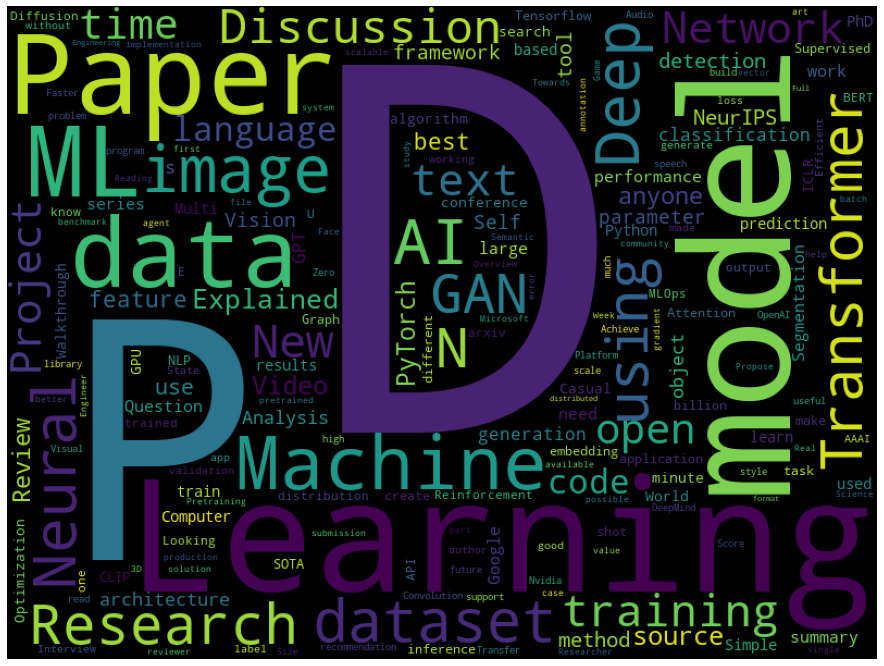

In [8]:
ml_wordcloud = wordcloud_class.generate(text_per_subreddit["MachineLearning"])
plot_cloud(ml_wordcloud)

Word cloud for titles in r/LearnMachineLearning.

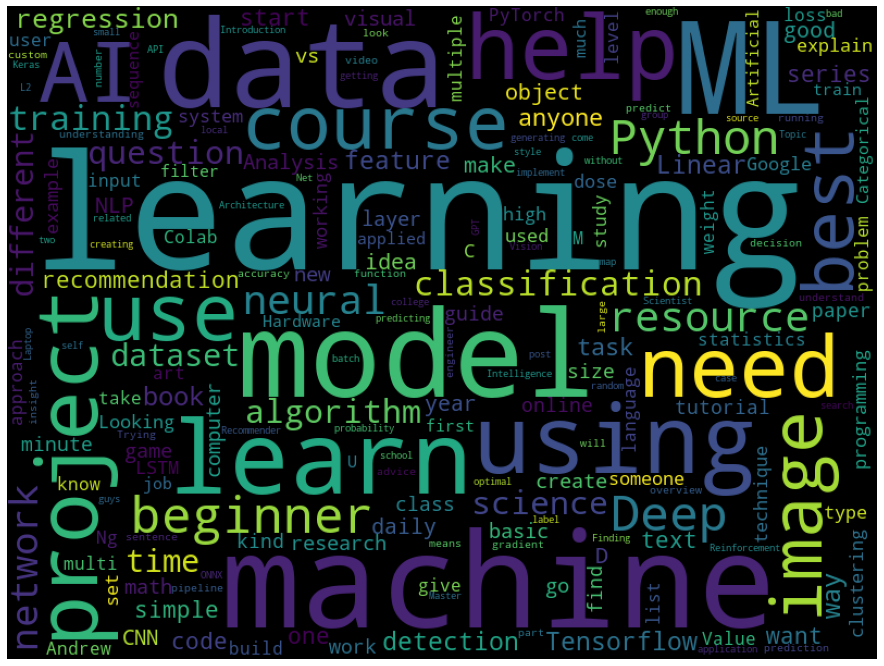

In [9]:
learnml_wordcloud = wordcloud_class.generate(text_per_subreddit["LearnMachineLearning"])
plot_cloud(learnml_wordcloud)